# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다. 
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1]:
path = 'C:/Users/User/project/'

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.


### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [3]:
file1 = 'data1.pkl'
data = joblib.load(path + file1)

In [4]:
data.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,MA_wt7,ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,NaN,0.877647


In [5]:
data.shape

(2922, 21)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2922 non-null   datetime64[ns]
 1   car_cnt          2922 non-null   int64         
 2   request_cnt      2922 non-null   int64         
 3   ride_cnt         2922 non-null   int64         
 4   waiting_time     2922 non-null   float64       
 5   fare             2922 non-null   int64         
 6   distance         2922 non-null   int64         
 7   target           2922 non-null   float64       
 8   temp_max         2922 non-null   float64       
 9   temp_min         2922 non-null   float64       
 10  rain(mm)         2922 non-null   float64       
 11  humidity_max(%)  2922 non-null   float64       
 12  humidity_min(%)  2922 non-null   float64       
 13  sunshine(MJ/m2)  2922 non-null   float64       
 14  weekday          2922 non-null   categor

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다. 
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 : 
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [7]:
# 숫자형 변수 분석
def eda_1_n(data, var, hue_var = ''):
    display(data[[var]].describe().T)

    if hue_var == '' :
        plt.figure(figsize = (15,10))
        plt.subplot(2,1,1)
        sns.histplot(data[var], kde = True, bins = 50)
        plt.grid()

        plt.subplot(2,1,2)
        sns.boxplot(x = data[var])
        plt.grid()
        plt.show()
    else :
        plt.figure(figsize = (15,5))
        plt.subplot(1,2,1)
        sns.kdeplot(x= var, data = data, hue = hue_var)
        plt.grid()

        plt.subplot(1,2,2)
        sns.boxplot(x = hue_var, y = var, data = data)
        plt.grid()


In [8]:
# 범주형 변수 분석
def eda_1_c(data, var, hue_var = ''):

    cnt = data[var].value_counts()
    prop = data[var].value_counts()/data.shape[0]
    result = pd.DataFrame({'Count':cnt, 'Prop':prop})
    display(result)

    sns.countplot(x = var, data = data)
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 접수건

,count,mean,std,min,25%,50%,75%,max
request_cnt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


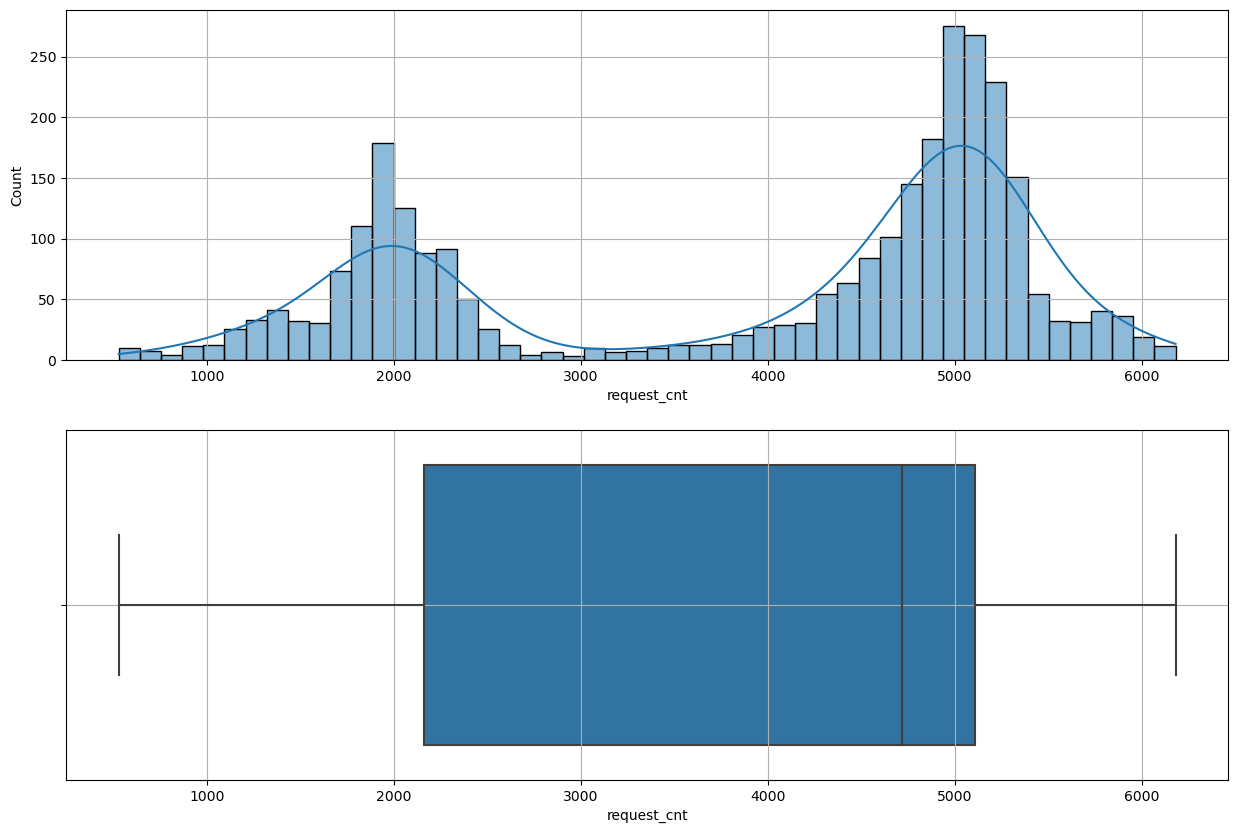

In [9]:
var = 'request_cnt'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
request_cnt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


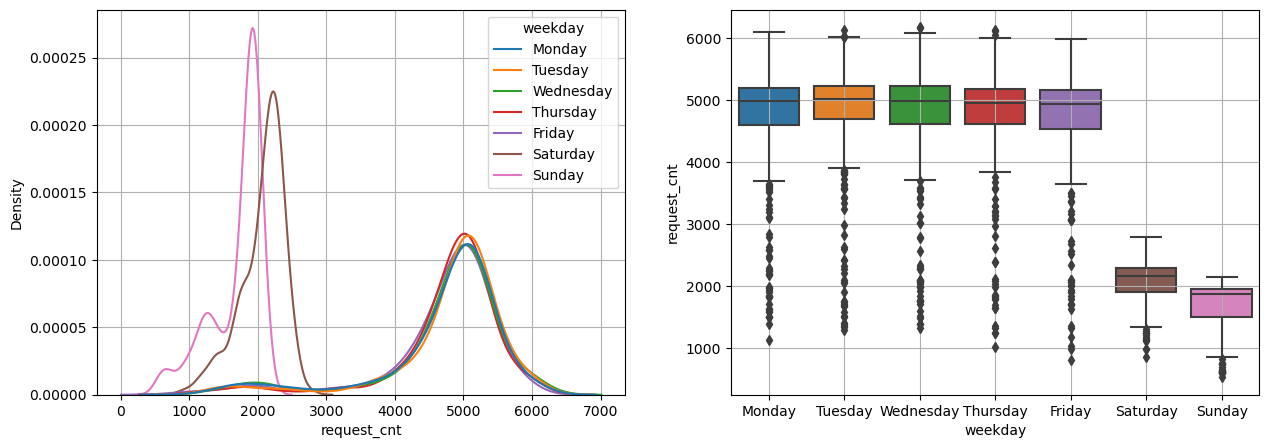

In [10]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
request_cnt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


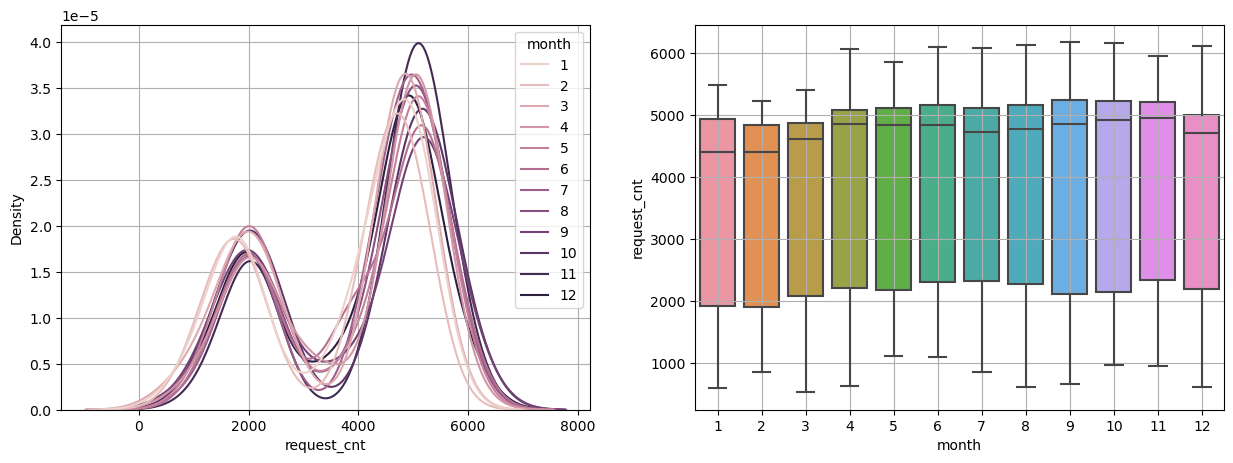

In [11]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
request_cnt,2922.0,3925.439767,1509.964823,527.0,2160.5,4720.5,5110.0,6182.0


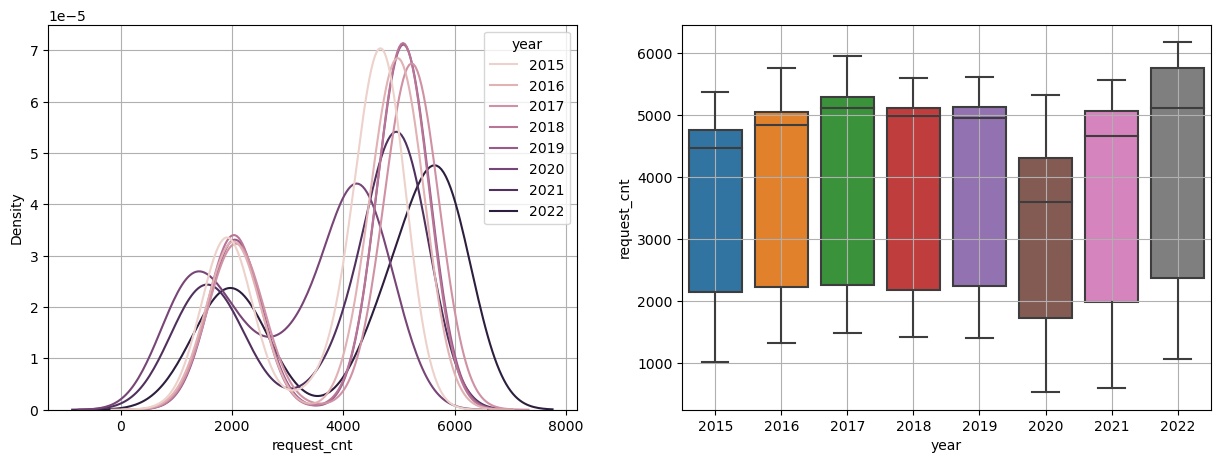

In [12]:
eda_1_n(data,var, 'year')

#### 2) 평균대기시간

,count,mean,std,min,25%,50%,75%,max
waiting_time,2922.0,40.30243,14.101169,17.2,29.6,38.2,48.6,96.1


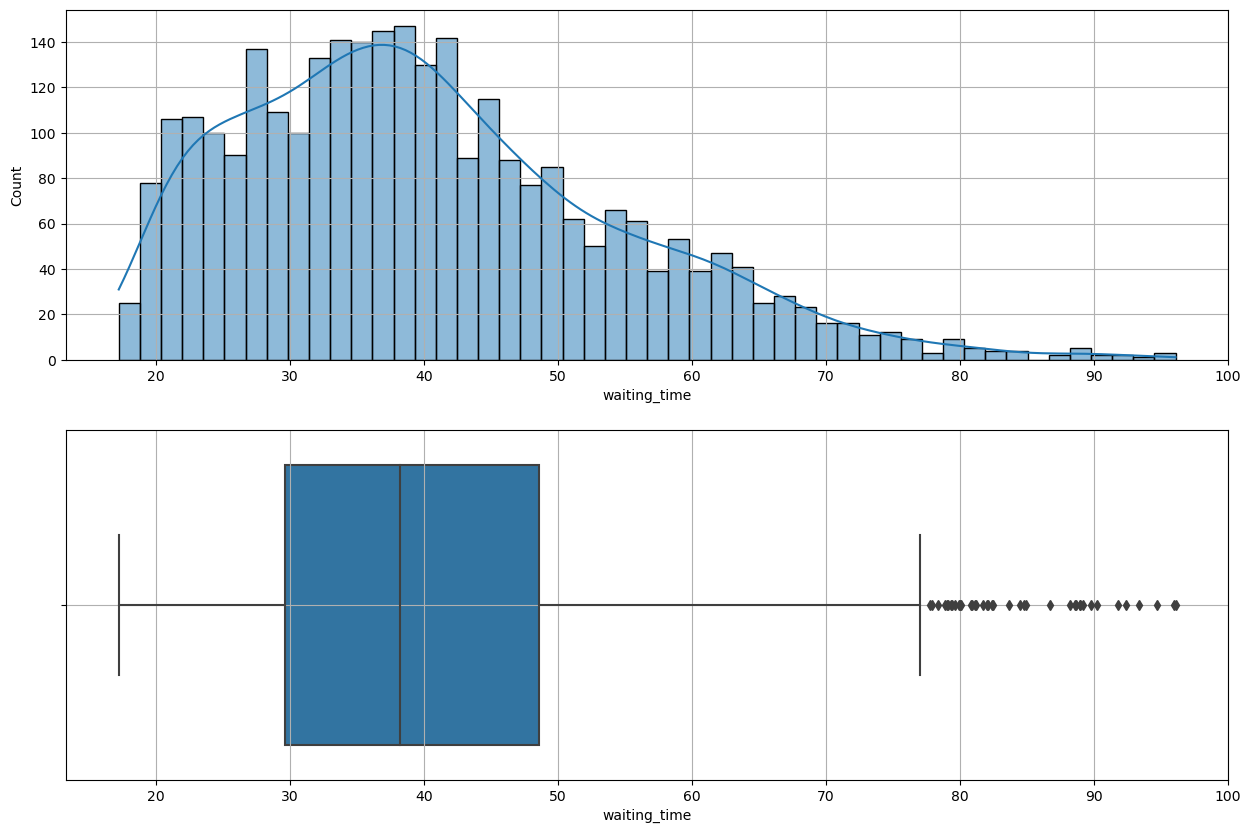

In [13]:
var = 'waiting_time'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
waiting_time,2922.0,40.30243,14.101169,17.2,29.6,38.2,48.6,96.1


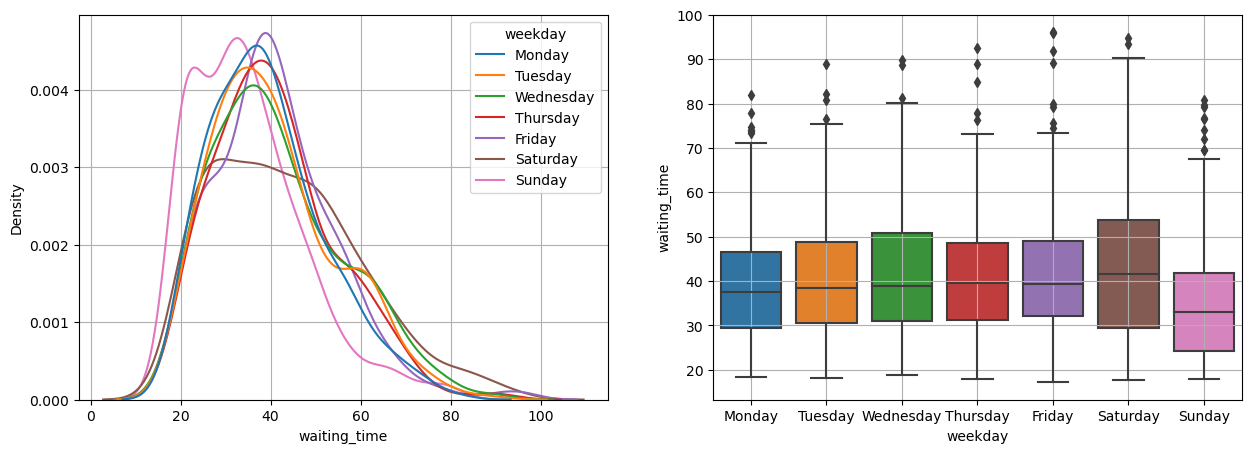

In [14]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
waiting_time,2922.0,40.30243,14.101169,17.2,29.6,38.2,48.6,96.1


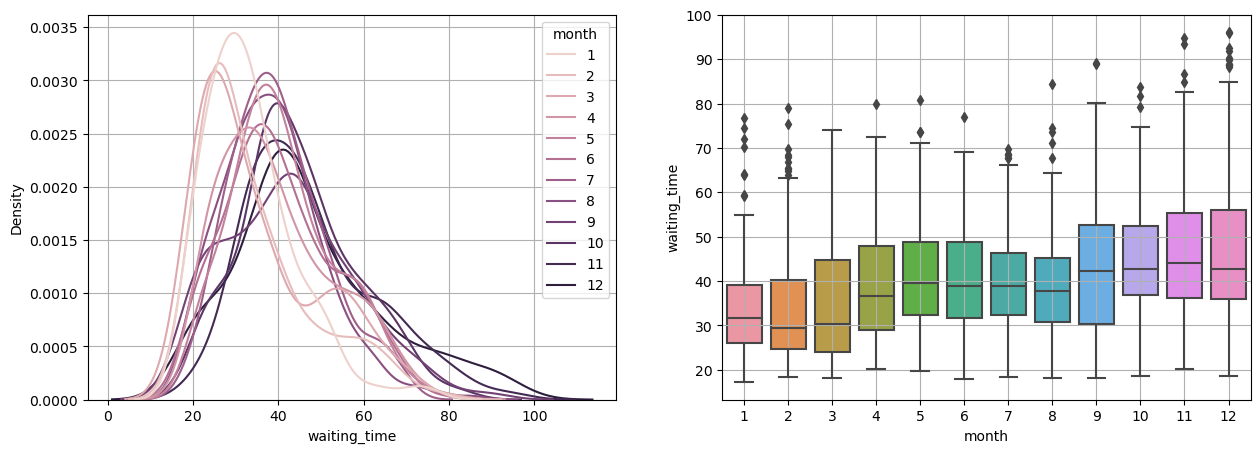

In [15]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
waiting_time,2922.0,40.30243,14.101169,17.2,29.6,38.2,48.6,96.1


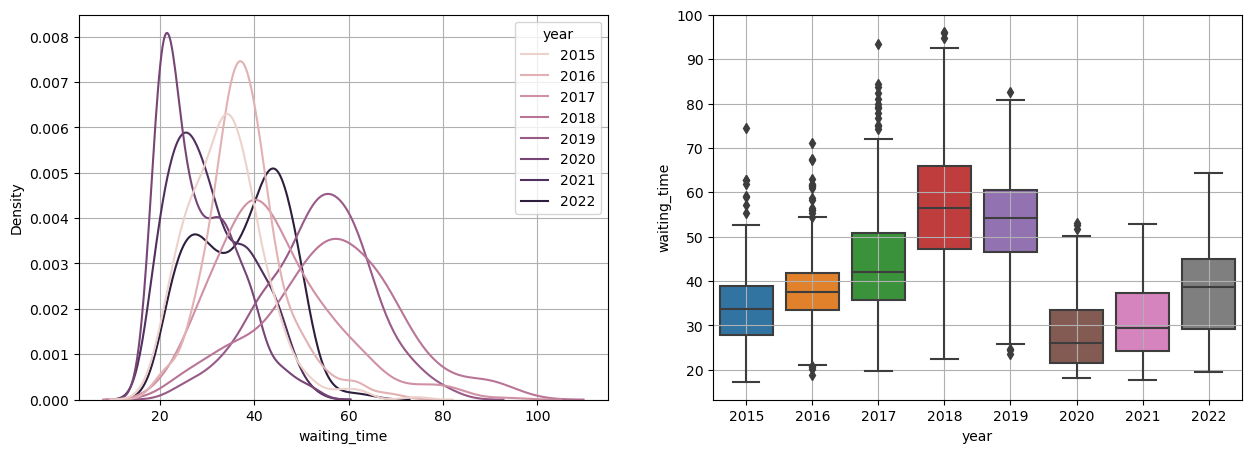

In [16]:
eda_1_n(data,var, 'year')

#### 3) 평균운임

,count,mean,std,min,25%,50%,75%,max
fare,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


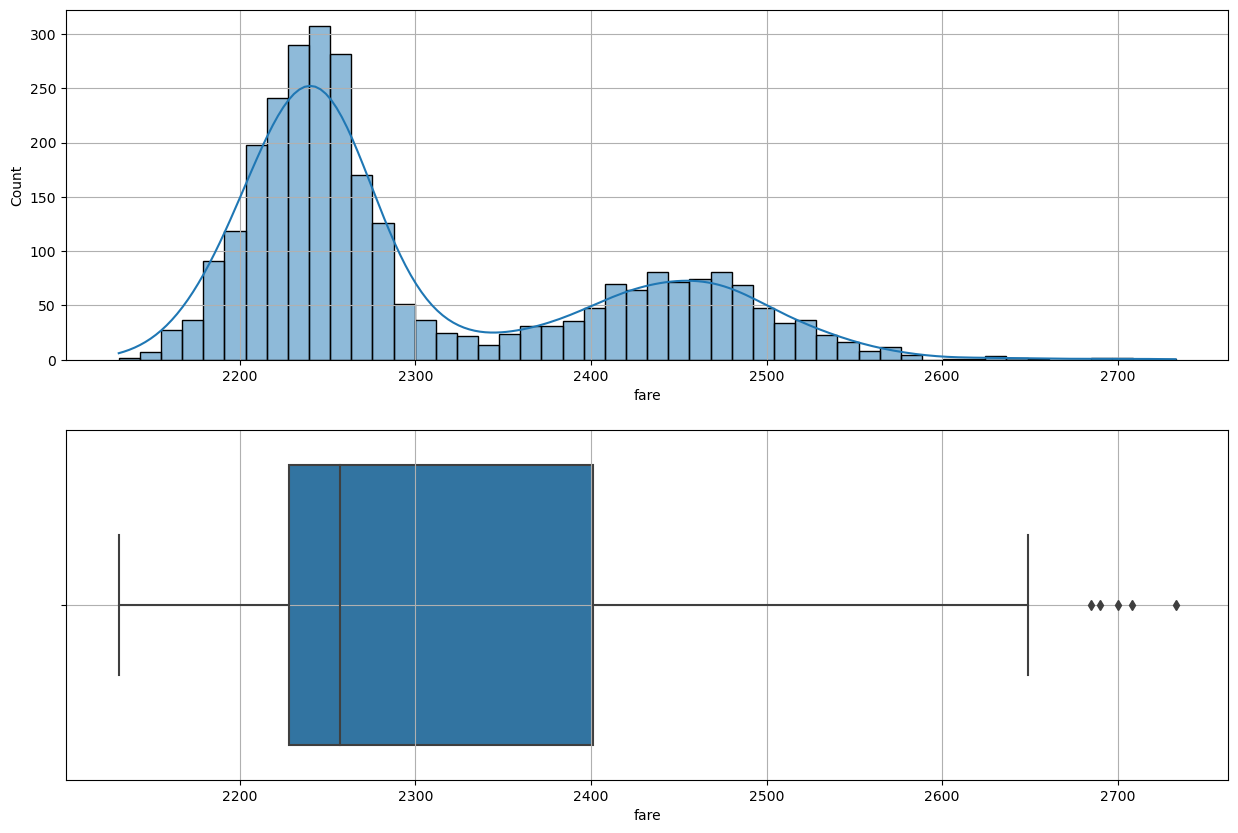

In [17]:
var = 'fare'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
fare,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


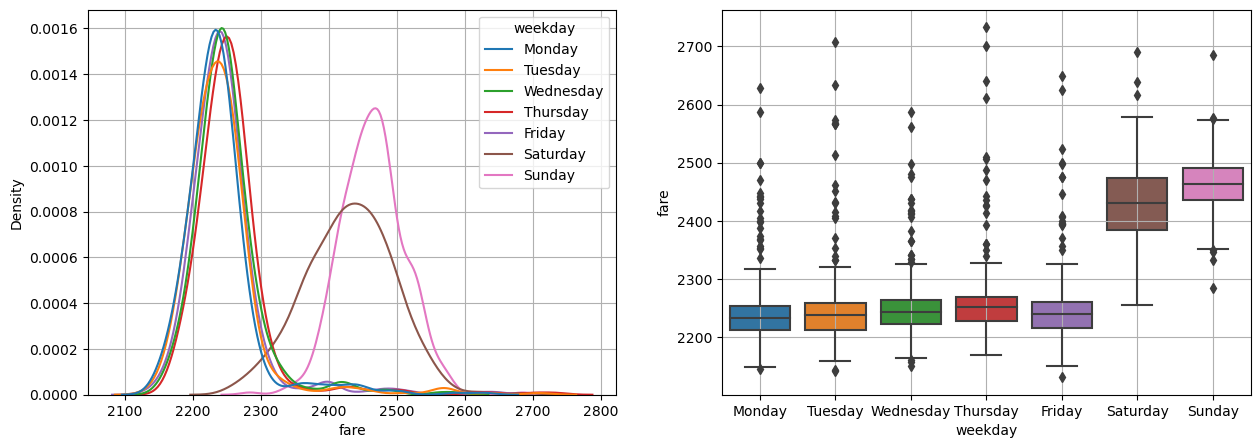

In [18]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
fare,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


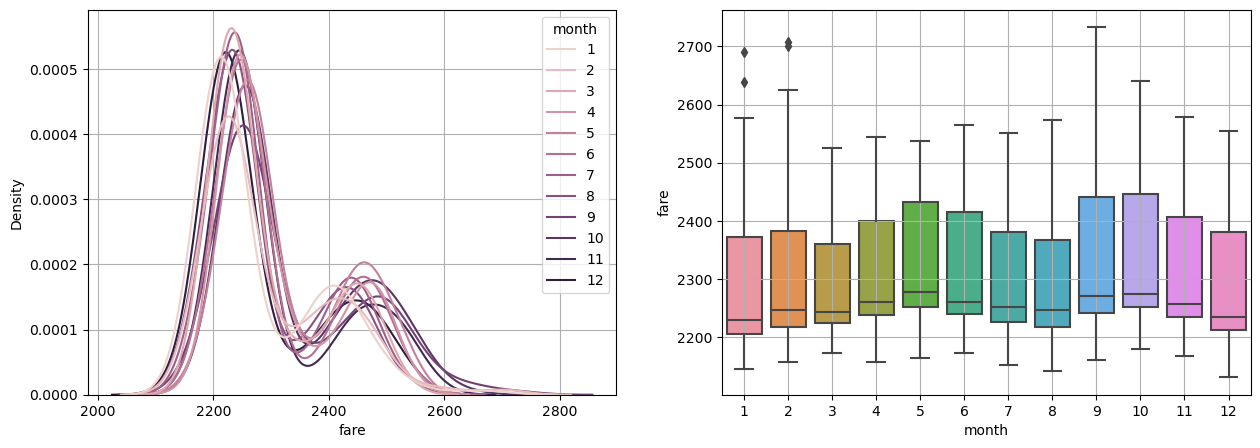

In [19]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
fare,2922.0,2304.357632,107.369846,2131.0,2228.0,2257.0,2401.0,2733.0


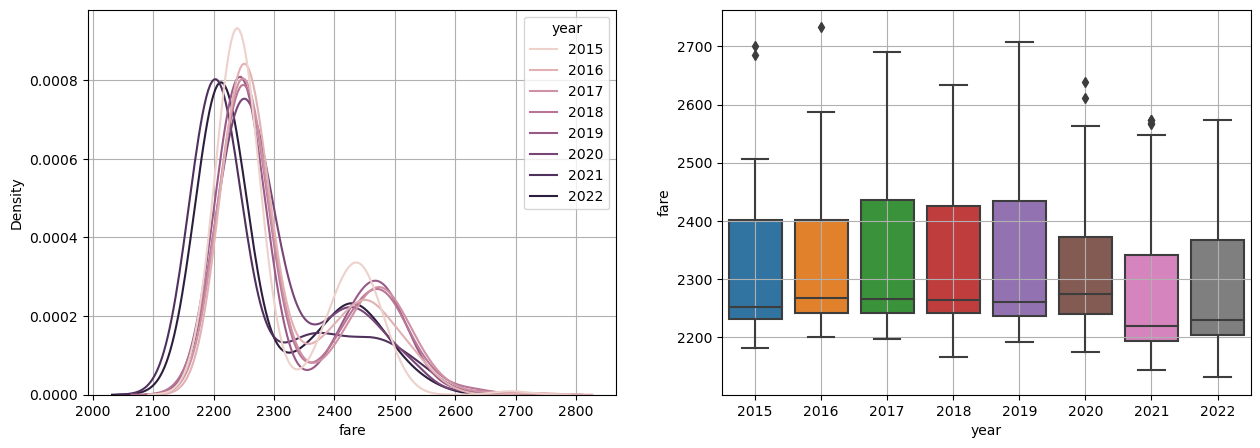

In [20]:
eda_1_n(data,var, 'year')

#### 4) 평균거리

,count,mean,std,min,25%,50%,75%,max
distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


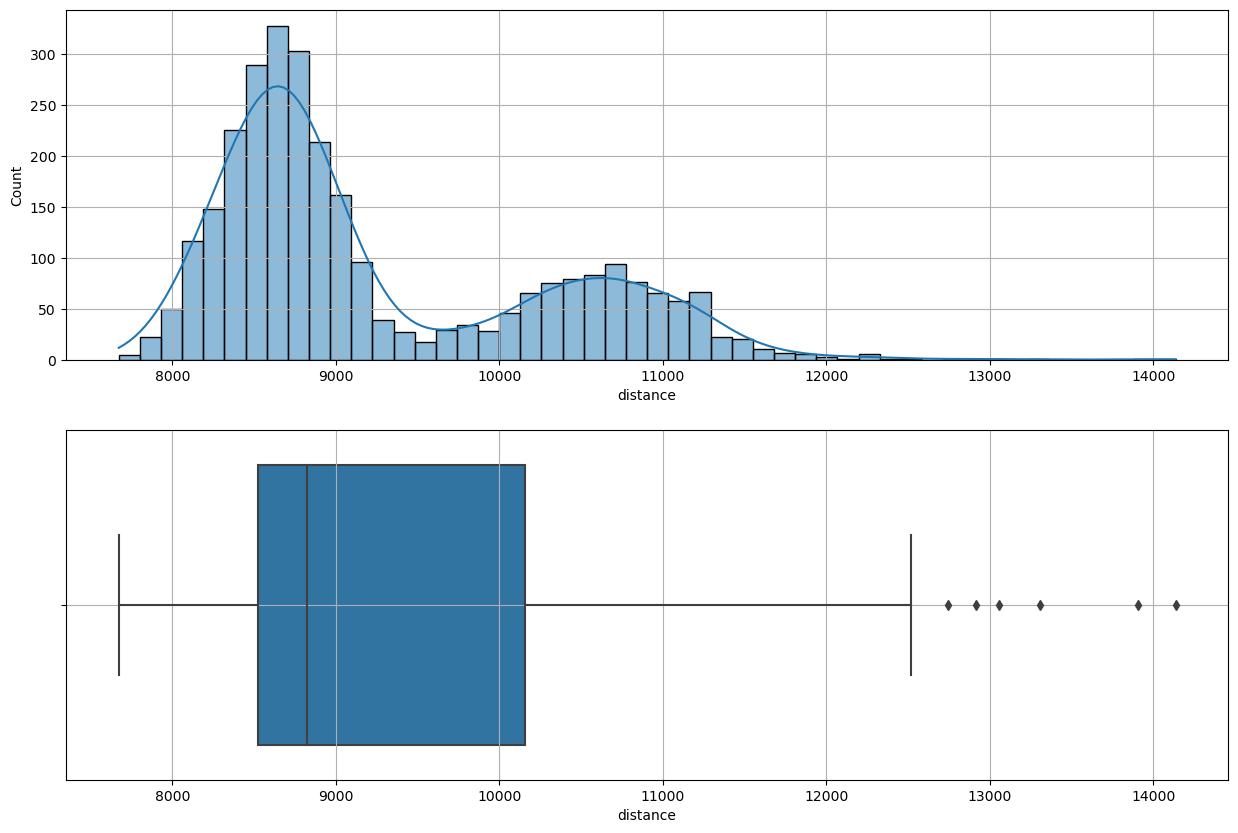

In [21]:
var = 'distance'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


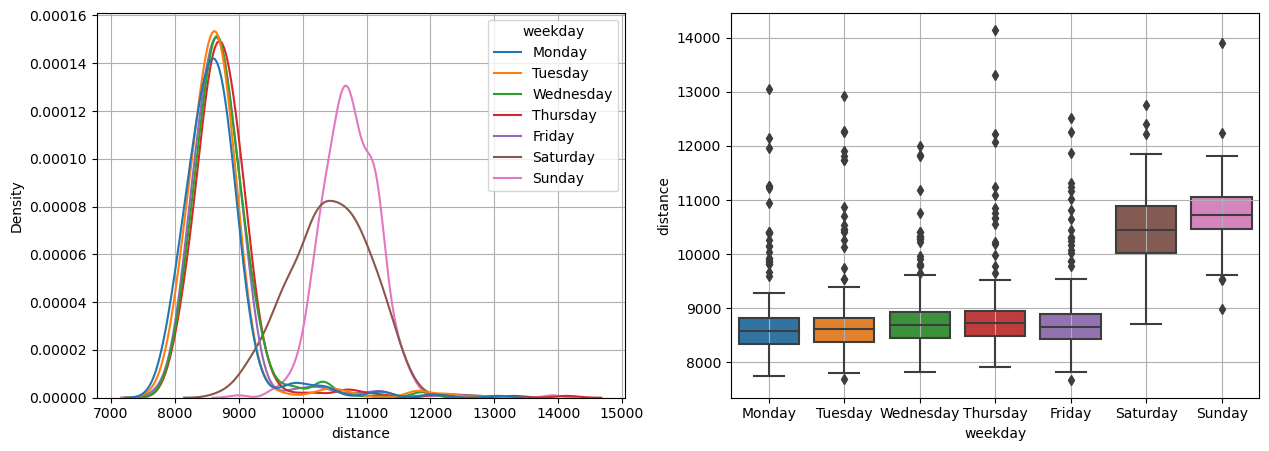

In [22]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


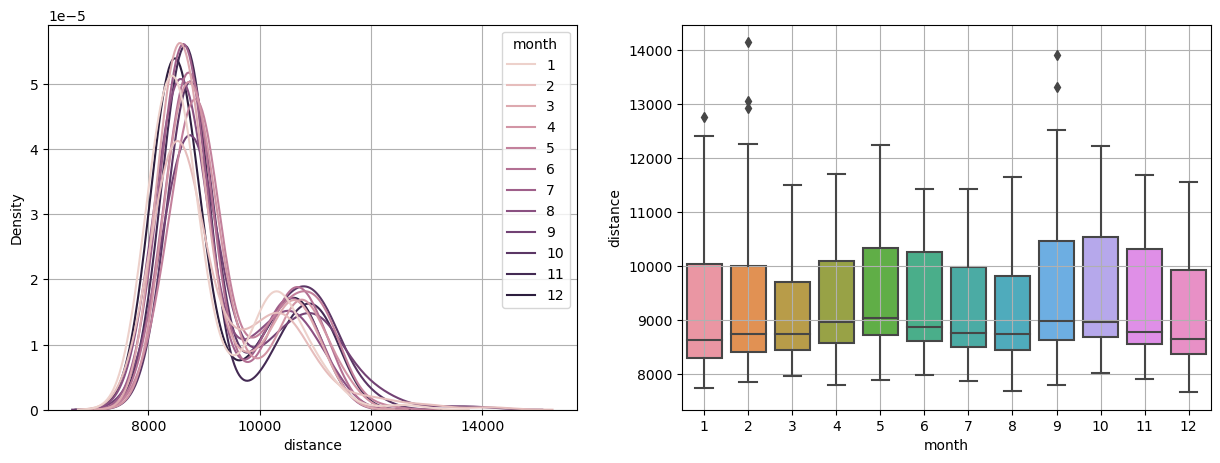

In [23]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
distance,2922.0,9254.291239,1020.236019,7672.0,8521.0,8821.5,10154.0,14136.0


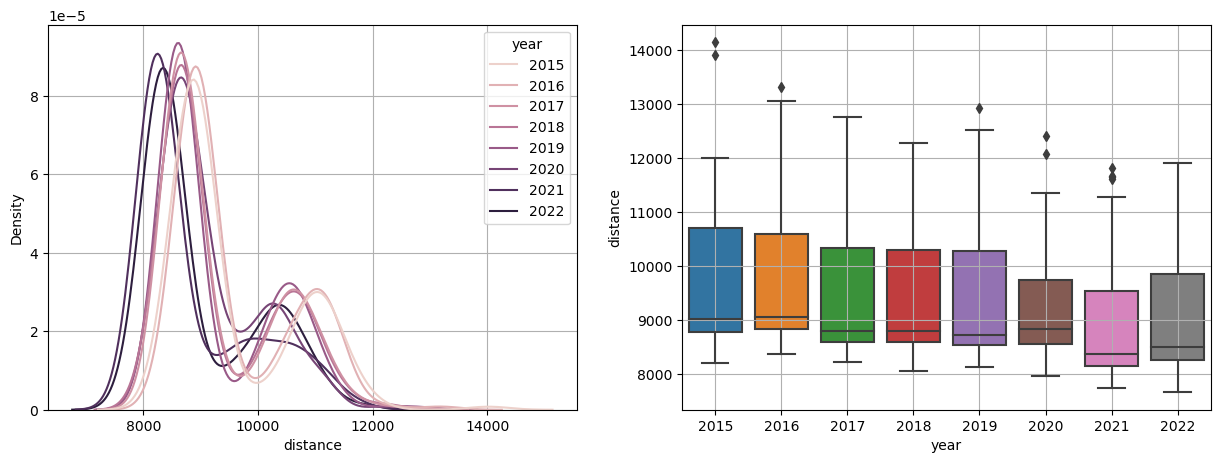

In [24]:
eda_1_n(data,var, 'year')

In [25]:
list(data)

['Date',
 'car_cnt',
 'request_cnt',
 'ride_cnt',
 'waiting_time',
 'fare',
 'distance',
 'target',
 'temp_max',
 'temp_min',
 'rain(mm)',
 'humidity_max(%)',
 'humidity_min(%)',
 'sunshine(MJ/m2)',
 'weekday',
 'month',
 'season',
 'year',
 'holiday',
 'MA_wt7',
 'ride_rate']

#### 5) 탑승률

,count,mean,std,min,25%,50%,75%,max
ride_rate,2922.0,0.841568,0.052176,0.596996,0.80596,0.845615,0.87772,0.968844


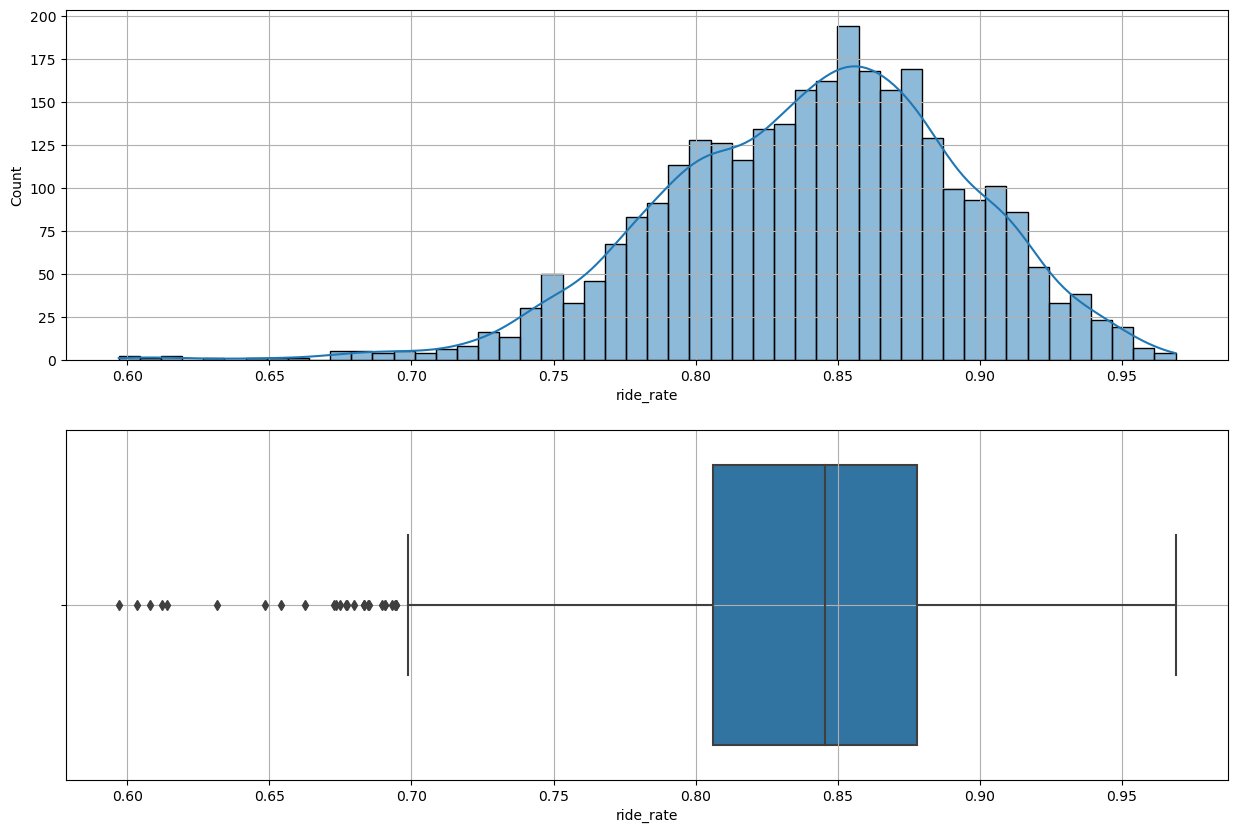

In [26]:
var = 'ride_rate'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
ride_rate,2922.0,0.841568,0.052176,0.596996,0.80596,0.845615,0.87772,0.968844


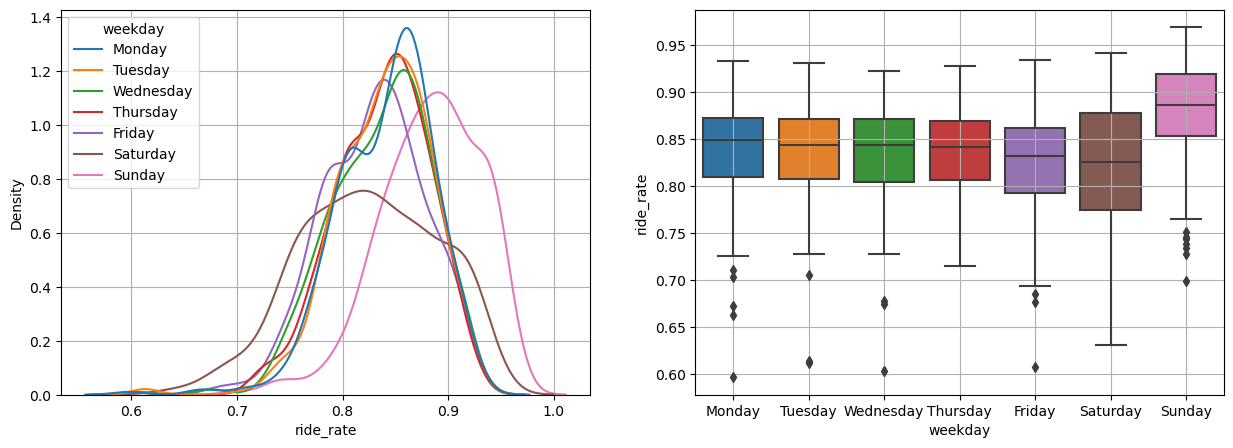

In [27]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
ride_rate,2922.0,0.841568,0.052176,0.596996,0.80596,0.845615,0.87772,0.968844


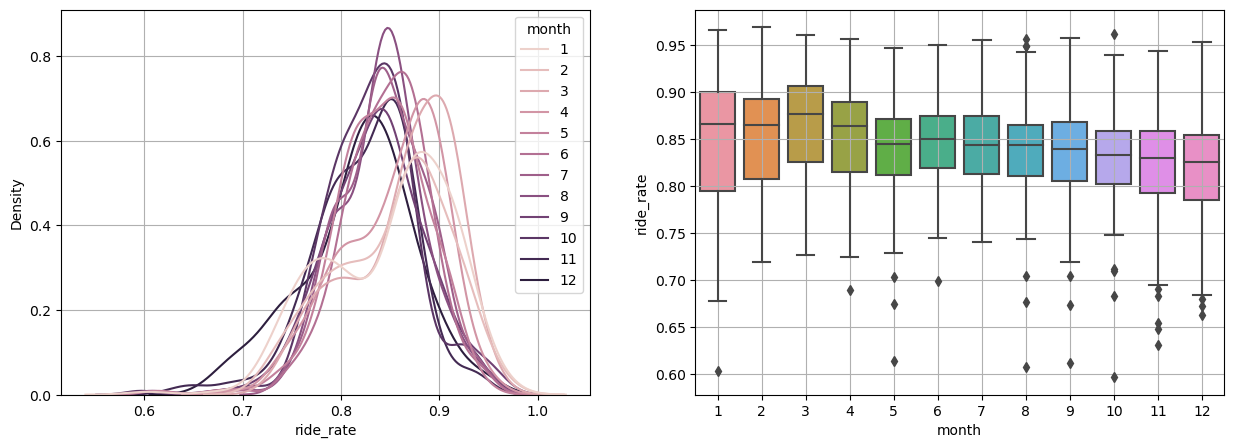

In [28]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
ride_rate,2922.0,0.841568,0.052176,0.596996,0.80596,0.845615,0.87772,0.968844


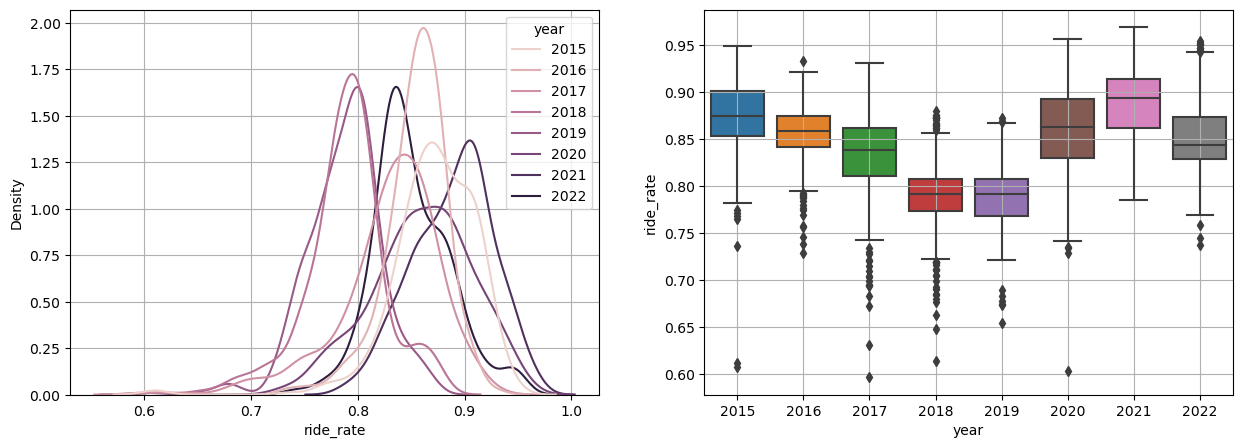

In [29]:
eda_1_n(data,var, 'year')

#### 6) 최고기온(°C)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


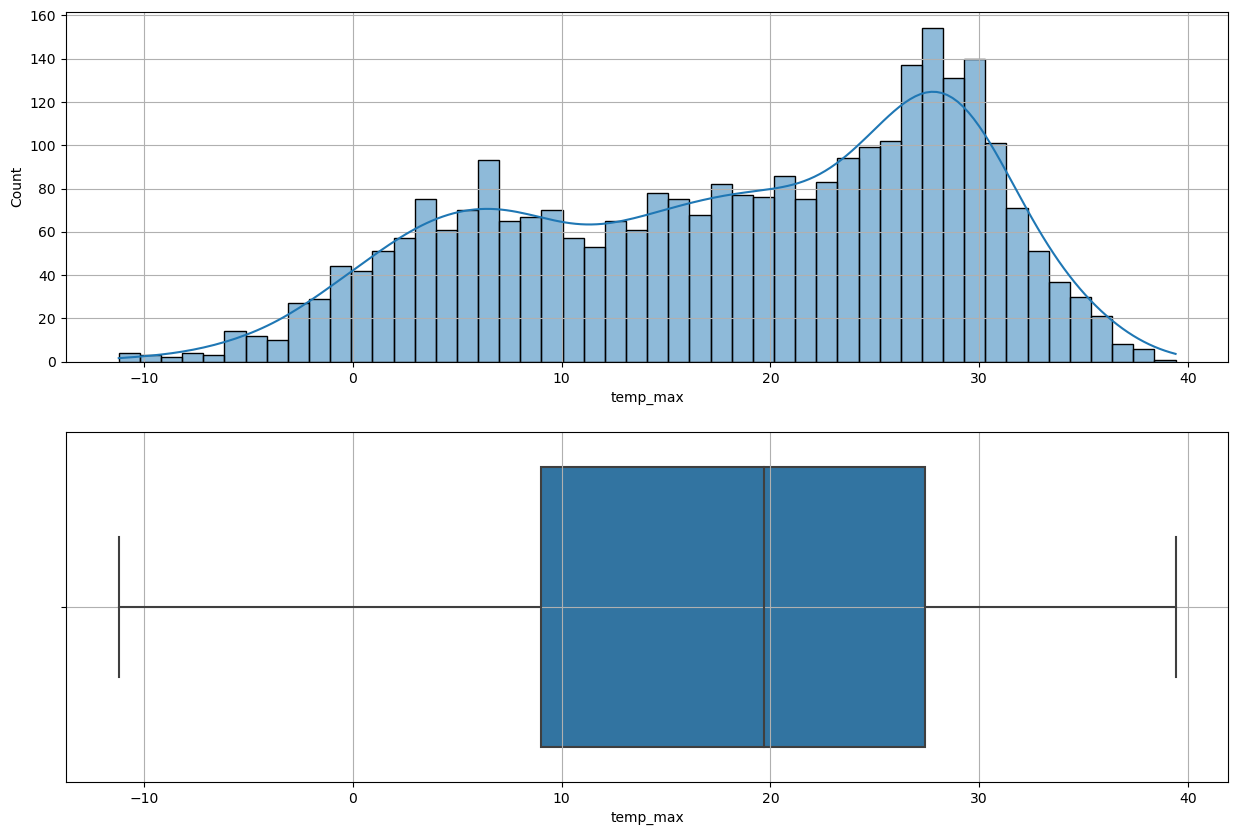

In [30]:
var = 'temp_max'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


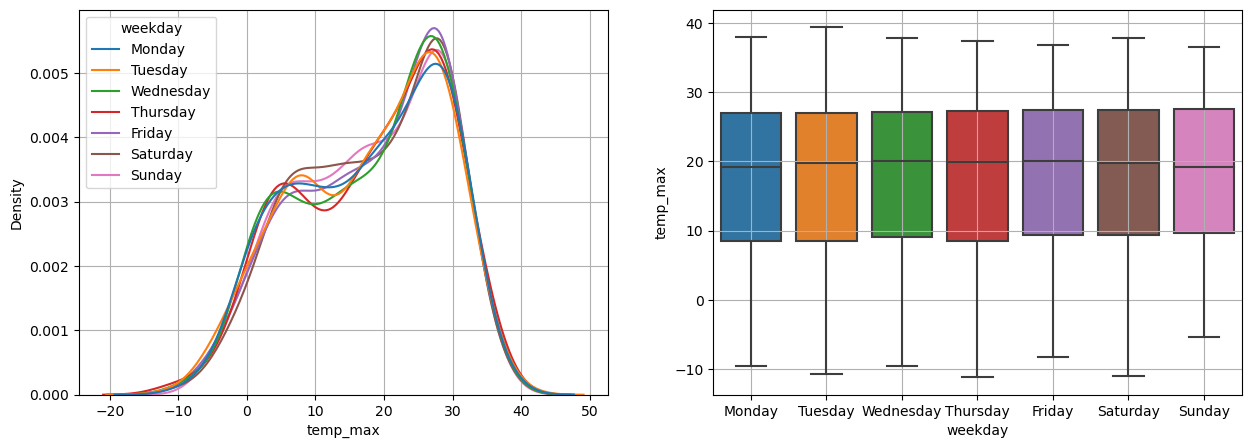

In [31]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


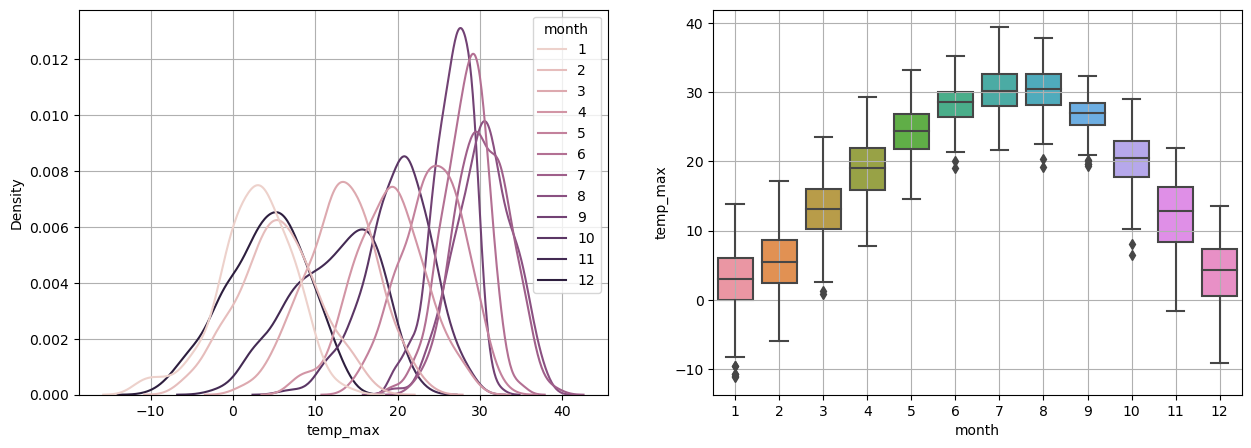

In [32]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
temp_max,2922.0,18.0795,10.705421,-11.2,9.0,19.7,27.4,39.4


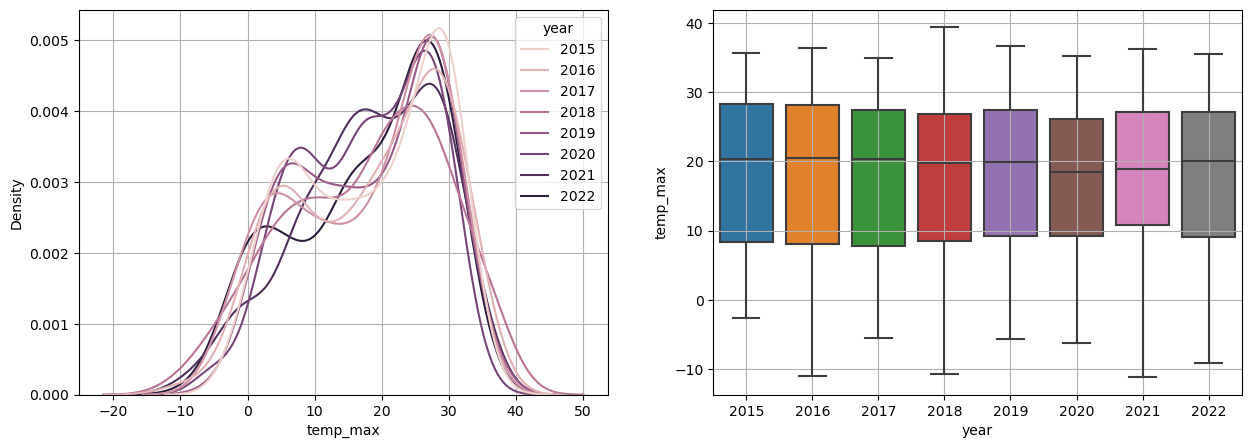

In [33]:
eda_1_n(data,var, 'year')

In [34]:
list(data)

['Date',
 'car_cnt',
 'request_cnt',
 'ride_cnt',
 'waiting_time',
 'fare',
 'distance',
 'target',
 'temp_max',
 'temp_min',
 'rain(mm)',
 'humidity_max(%)',
 'humidity_min(%)',
 'sunshine(MJ/m2)',
 'weekday',
 'month',
 'season',
 'year',
 'holiday',
 'MA_wt7',
 'ride_rate']

#### 7) 일강수량(mm)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


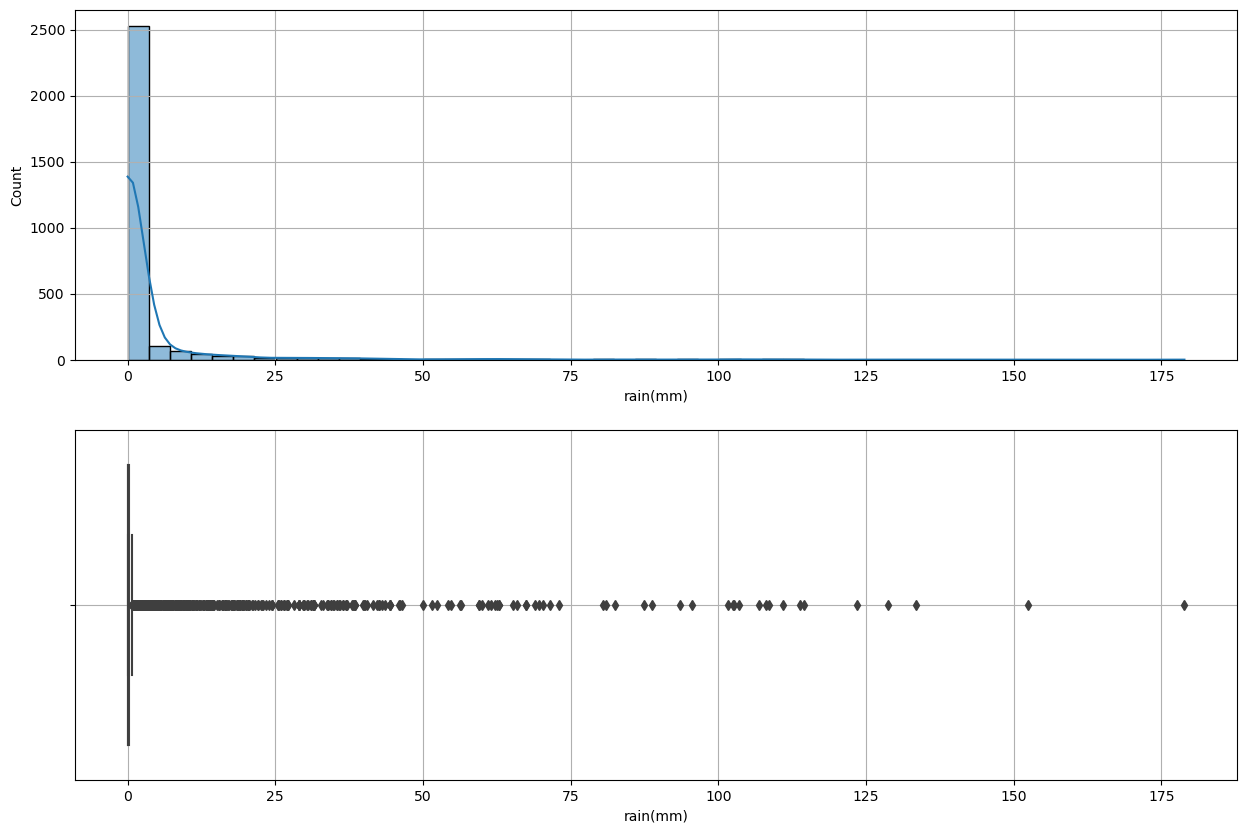

In [35]:
var = 'rain(mm)'
eda_1_n(data,var)

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


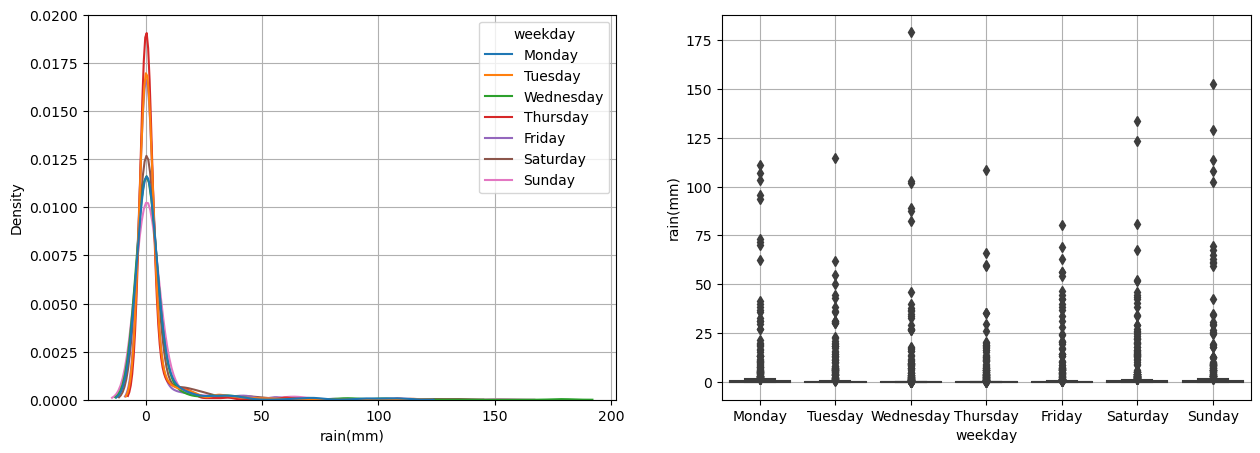

In [36]:
eda_1_n(data,var, 'weekday')

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


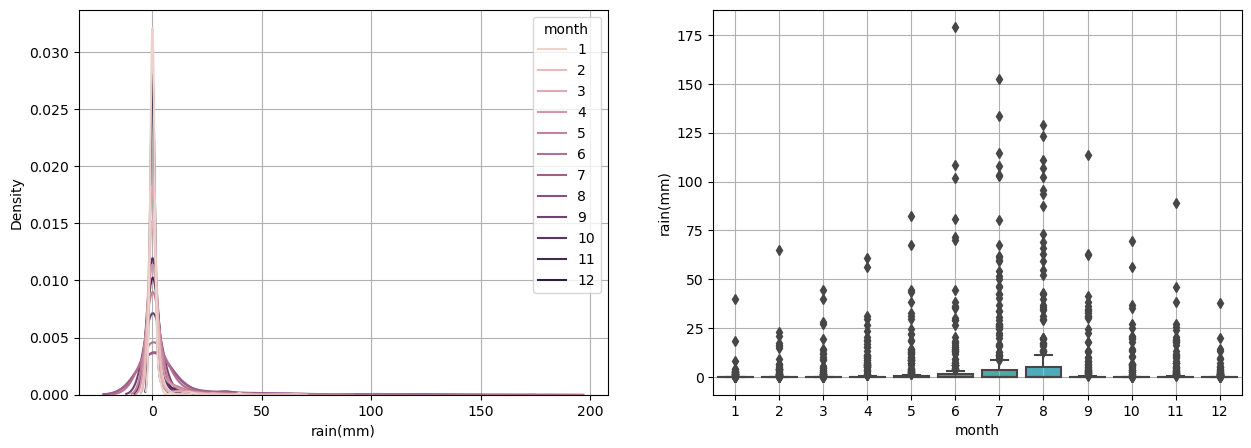

In [37]:
eda_1_n(data,var, 'month')

,count,mean,std,min,25%,50%,75%,max
rain(mm),2922.0,3.355613,12.595804,0.0,0.0,0.0,0.3,178.9


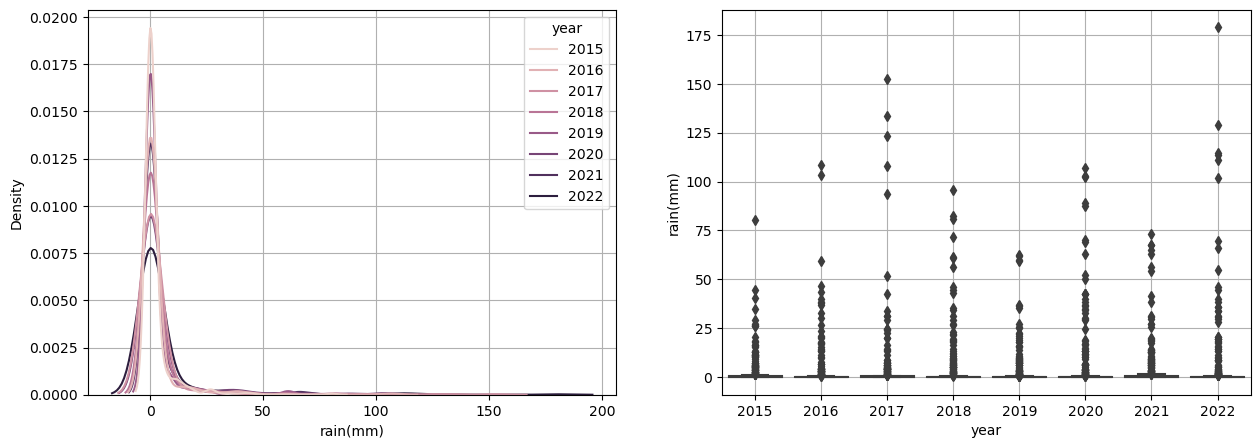

In [38]:
eda_1_n(data,var, 'year')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

#### 1) 공휴일 유무

In [39]:
data.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,MA_wt7,ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,NaN,0.877647


,Count,Prop
holiday,,
0.0,2802,0.958932
1.0,120,0.041068


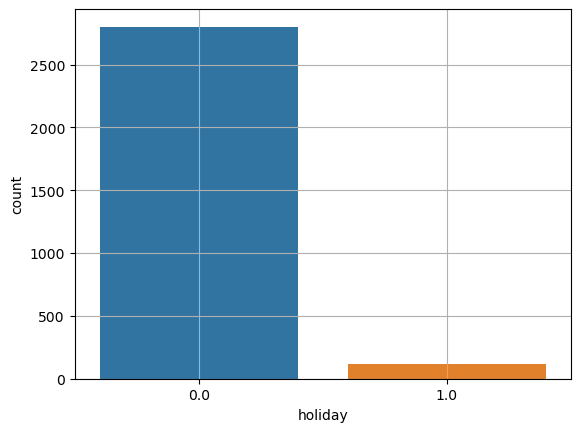

In [40]:
var = 'holiday'
eda_1_c(data, var)

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

In [41]:
data.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,target,temp_max,temp_min,...,humidity_max(%),humidity_min(%),sunshine(MJ/m2),weekday,month,season,year,holiday,MA_wt7,ride_rate
0,2015-01-01,213,1023,924,23.2,2427,10764,17.2,-2.0,-8.9,...,63.0,28.0,9.07,Thursday,1,Winter,2015,1.0,NaN,0.903226
1,2015-01-02,420,3158,2839,17.2,2216,8611,26.2,2.4,-9.2,...,73.0,37.0,8.66,Friday,1,Winter,2015,0.0,NaN,0.898987
2,2015-01-03,209,1648,1514,26.2,2377,10198,24.5,8.2,0.2,...,89.0,58.0,5.32,Saturday,1,Winter,2015,0.0,NaN,0.918689
3,2015-01-04,196,1646,1526,24.5,2431,10955,26.2,7.9,-0.9,...,95.0,52.0,6.48,Sunday,1,Winter,2015,0.0,NaN,0.927096
4,2015-01-05,421,4250,3730,26.2,2214,8663,23.6,4.1,-7.4,...,98.0,29.0,10.47,Monday,1,Winter,2015,0.0,NaN,0.877647


#### 1) 전체 상관계수 시각화

In [42]:
# 전체 상관관계를 한눈에 보여주기 함수
def eda_2_corr(data, num_vars):

    temp = data.loc[:, num_vars]
    corr = temp.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    display(mask * corr)

    sns.set(style='white')
    plt.figure(figsize=(12, 12))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, annot = True)
    plt.show()

,target,waiting_time,car_cnt,request_cnt,ride_cnt,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),ride_rate,MA_wt7
target,1.0,0.732416,0.088040,0.316562,0.229574,-0.049645,-0.084684,0.044325,0.033592,0.028469,-0.036370,-0.092435,-0.042084,-0.588372,0.799435
waiting_time,0.0,1.000000,0.036089,0.292189,0.184689,0.019297,-0.014108,0.040628,0.034275,-0.005636,-0.040383,-0.086896,-0.044075,-0.769957,0.841950
car_cnt,0.0,0.000000,1.000000,0.885891,0.904666,-0.844747,-0.857720,0.108444,0.109567,0.002630,0.049112,0.088131,0.076509,-0.028390,-0.068447
request_cnt,0.0,0.000000,0.000000,1.000000,0.988755,-0.850509,-0.847931,0.057957,0.054169,-0.012803,-0.013810,-0.000597,0.024437,-0.251192,0.186614
ride_cnt,0.0,0.000000,0.000000,0.000000,1.000000,-0.868124,-0.858811,0.064283,0.058452,-0.015746,-0.008045,0.006238,0.040464,-0.117494,0.079773
fare,-0.0,0.000000,-0.000000,-0.000000,-0.000000,1.000000,0.977615,0.083955,0.070507,0.011267,0.019822,-0.035445,0.008843,0.007470,0.121687
distance,-0.0,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.088111,0.073573,0.004747,0.020547,-0.040055,-0.000657,0.047524,0.077715
temp_max,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.961573,0.116839,0.306414,0.284582,0.475197,0.023756,0.037473
temp_min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.201817,0.401052,0.462011,0.308483,0.013347,0.028525
rain(mm),0.0,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.335441,0.446553,-0.285402,-0.004506,-0.014101


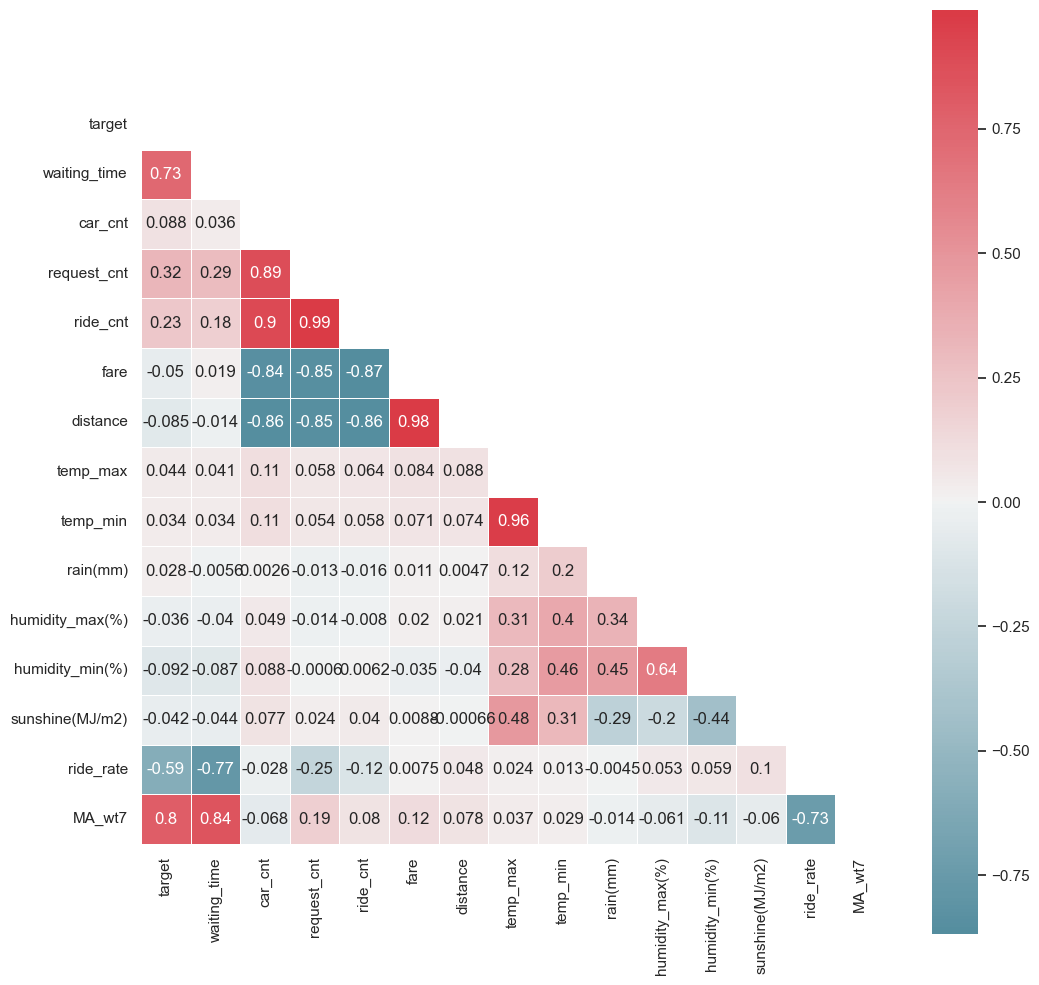

In [43]:
num_vars = ['target','waiting_time','car_cnt','request_cnt','ride_cnt','fare','distance','temp_max','temp_min','rain(mm)',
             'humidity_max(%)','humidity_min(%)','sunshine(MJ/m2)', 'ride_rate','MA_wt7']

eda_2_corr(data, num_vars)

#### 2) 산점도

In [44]:
def eda_2_nn(data, target, var, hue = ''):

    plt.figure(figsize = (8,8))
    if hue == '' :
        sns.scatterplot(x = var, y = target, data = data)
        plt.grid()

    if hue != '' :
        sns.scatterplot(x = var, y = target, data = data, hue = hue)
        plt.grid()

    plt.show()

* ride_rate

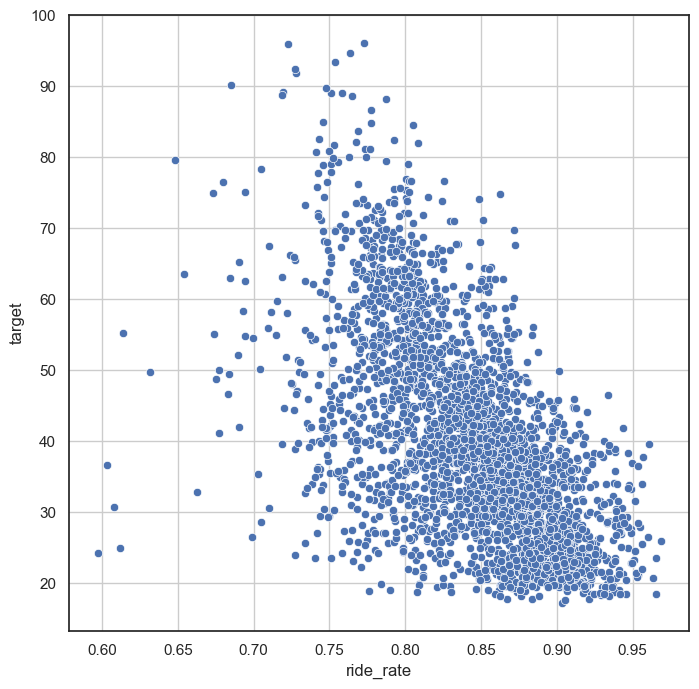

In [45]:
eda_2_nn(data, 'target', 'ride_rate')

* fare

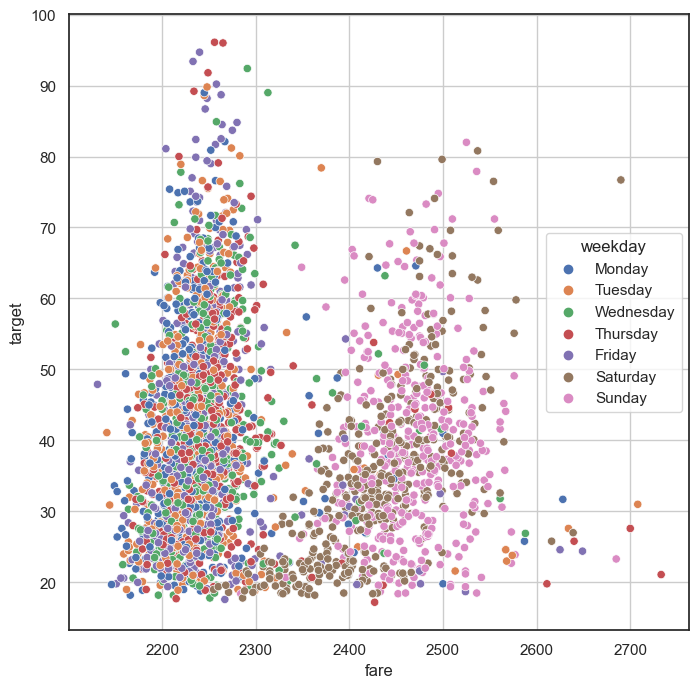

In [46]:
eda_2_nn(data, 'target', 'fare', 'weekday')

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

* 휴일 여부

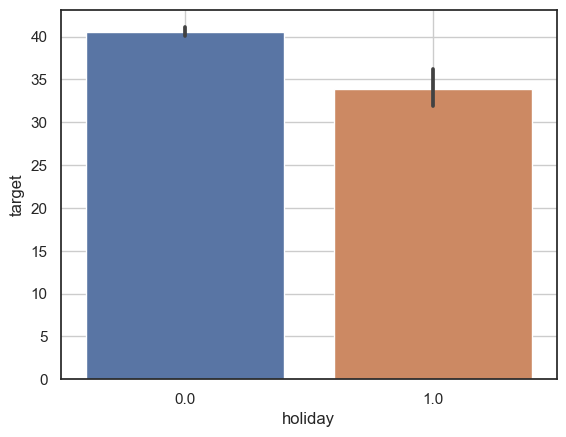

In [47]:
sns.barplot(x = 'holiday', y = 'target', data = data)
plt.grid()
plt.show()

In [48]:
# t-test
h0 = data.loc[data['holiday']==0, 'target']
h1 = data.loc[data['holiday']==1, 'target']
spst.ttest_ind(h0, h1)

TtestResult(statistic=5.078160958101015, pvalue=4.0505005123594406e-07, df=2920.0)

* 요일

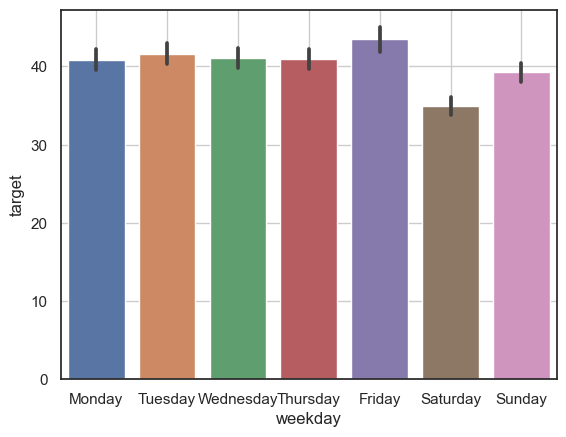

In [49]:
sns.barplot(x = 'weekday', y = 'target', data = data)
plt.grid()
plt.show()

In [50]:
# anova
temp = data.loc[data['weekday'].notnull()]

w0 = temp.loc[temp['weekday']=='Monday', 'target']
w1 = temp.loc[temp['weekday']=='Tuesday', 'target']
w2 = temp.loc[temp['weekday']=='Wednesday', 'target']
w3 = temp.loc[temp['weekday']=='Thursday', 'target']
w4 = temp.loc[temp['weekday']=='Friday', 'target']
w5 = temp.loc[temp['weekday']=='Saturday', 'target']
w6 = temp.loc[temp['weekday']=='Sunday', 'target']

spst.f_oneway(w0,w1,w2,w3,w4,w5,w6)

F_onewayResult(statistic=15.668738200566109, pvalue=8.766163819661817e-18)

* 계절

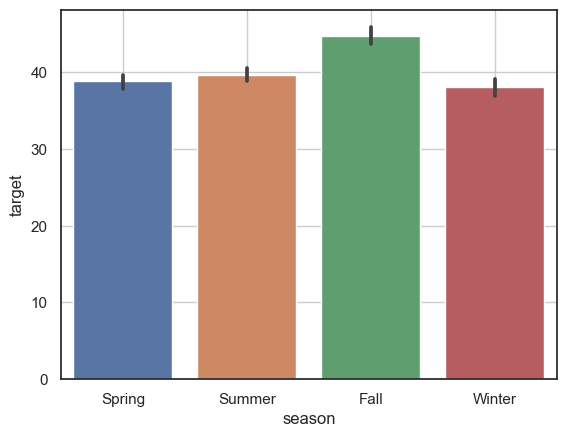

In [51]:
sns.barplot(x = 'season', y = 'target', data = data)
plt.grid()
plt.show()

In [52]:
# anova
temp = data.loc[data['season'].notnull()]

s0 = temp.loc[temp['season']=='Spring', 'target']
s1 = temp.loc[temp['season']=='Summer', 'target']
s2 = temp.loc[temp['season']=='Fall', 'target']
s3 = temp.loc[temp['season']=='Winter', 'target']

spst.f_oneway(s0,s1,s2,s3)

F_onewayResult(statistic=34.73562423868687, pvalue=4.719868115759872e-22)

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [53]:
# waiting_time, MA_wt7, ride_rate, holiday

* 중간(약한) 관계의 변수

In [54]:
# car_cnt, fare, distance, weekday, season

* (거의) 관계가 없는 변수

In [55]:
# 나머지 변수들

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [56]:
joblib.dump(data, path + 'data2.pkl')

['C:/Users/User/project/data2.pkl']